In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
file1_csv = "city_data.csv"
file2_csv = "ride_data.csv"
city_data_df = pd.read_csv(file1_csv)
ride_data_df = pd.read_csv(file2_csv)

In [3]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
All_Data = pd.merge(city_data_df,ride_data_df, on='city')
All_Data.head()


,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [6]:
Avg_fare_city = All_Data.groupby("city")['fare'].mean()
Total_ride_city = All_Data.groupby("city")['ride_id'].count()
drive_count_city = All_Data.groupby('city')['driver_count'].max()
city_type_city = All_Data.groupby('city')["type"].max()
Total_fare_city = All_Data.groupby("city")['fare'].sum()

In [7]:
Pyber_Bubble_Plot = pd.DataFrame({"Average_Fare": Avg_fare_city,"Total_Rides":Total_ride_city,
                                  "Driver_Count":drive_count_city,"Type":city_type_city,
                                  "Total_Fare":Total_fare_city})
Pyber_Bubble_Plot_Type = Pyber_Bubble_Plot.groupby("Type").sum()


In [8]:
Pyber_Bubble_Plot_Type['Total_Rides']

Type
Rural        125
Suburban     657
Urban       1625
Name: Total_Rides, dtype: int64

In [9]:
Pyber_Bubble_Plot_Type['Driver_Count']

Type
Rural        104
Suburban     635
Urban       2607
Name: Driver_Count, dtype: int64

In [10]:
Pyber_Bubble_Plot_Fare = Pyber_Bubble_Plot.groupby('Type').sum()
Pyber_Bubble_Plot_Fare['Total_Fare']

Type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: Total_Fare, dtype: float64

In [11]:
Urban = Pyber_Bubble_Plot[Pyber_Bubble_Plot["Type"] == "Urban"]
Urban_Fare = Urban["Average_Fare"]
Urban_Rides = Urban["Total_Rides"]
Rural = Pyber_Bubble_Plot[Pyber_Bubble_Plot["Type"] == "Rural"]
Rural_Fare = Rural["Average_Fare"]
Rural_Rides = Rural["Total_Rides"]
Suburban = Pyber_Bubble_Plot[Pyber_Bubble_Plot["Type"] == "Suburban"]
Suburb_Fare = Suburban["Average_Fare"]
Suburb_Rides = Suburban["Total_Rides"]
Urban.head()

,Average_Fare,Driver_Count,Total_Fare,Total_Rides,Type
city,,,,,
Alvarezhaven,23.928710,21,741.79,31,Urban
Alyssaberg,20.609615,67,535.85,26,Urban
Antoniomouth,23.625000,21,519.75,22,Urban
Aprilchester,21.981579,49,417.65,19,Urban
Arnoldview,25.106452,41,778.30,31,Urban


# Bubble Plot of Ride Sharing Data

# Need to add Note

# Need to get grid gray with white lines

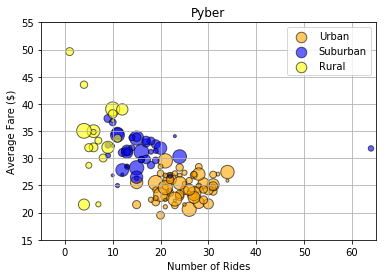

In [12]:
x_urban = Urban_Rides
y_urban = Urban_Fare
x_rural = Rural_Rides
y_rural = Rural_Fare
x_suburb = Suburb_Rides
y_suburb = Suburb_Fare

plt.ylim(15, 55)
plt.xlim(-5, 65)
# Add labels to the x and y axes
plt.title("Pyber")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare ($)")
plt.grid()

urban = plt.scatter(x_urban, y_urban, marker="o", facecolors="orange", edgecolors="black", s=drive_count_city*3,
                    alpha=.6, label = "Urban")
suburb = plt.scatter(x_suburb, y_suburb, marker="o", facecolors="blue", edgecolors="black",s=drive_count_city*3,
                    alpha=.6, label = "Suburban")
rural = plt.scatter(x_rural, y_rural, marker="o", facecolors="yellow", edgecolors="black",s=drive_count_city*3,
                    alpha=.6, label = "Rural")

plt.legend(handles=[urban,suburb,rural], loc="best")

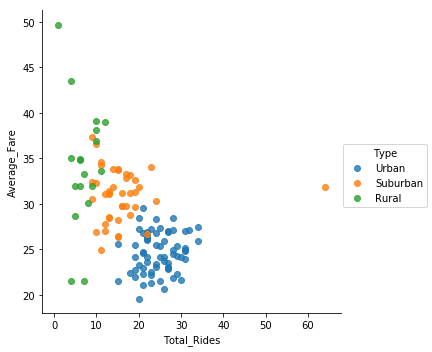

In [13]:
sns.lmplot(x="Total_Rides", y = "Average_Fare",data = Pyber_Bubble_Plot, fit_reg = False, hue = "Type")

In [14]:
colors = ["yellow", "lightskyblue","lightcoral"]
explode = (0, 0, 0.10)

In [15]:
Pyber_Bubble_Plot_Fare.index


Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='Type')

# % of Total Fares by City Type

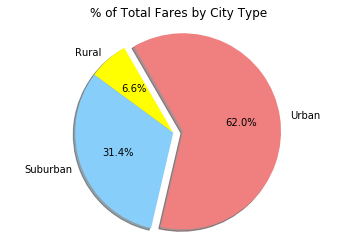

In [17]:
plt.title("% of Total Fares by City Type")
plt.pie(Pyber_Bubble_Plot_Fare['Total_Fare'], explode=explode, labels=Pyber_Bubble_Plot_Fare.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

# % of Total Rides by City Type

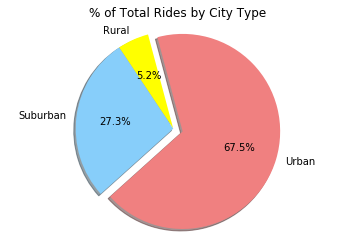

In [18]:
plt.title("% of Total Rides by City Type")
plt.pie(Pyber_Bubble_Plot_Type['Total_Rides'], explode=explode, labels=Pyber_Bubble_Plot_Fare.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=105)
plt.axis("equal")
plt.show()

# % of Total Drivers by City Type

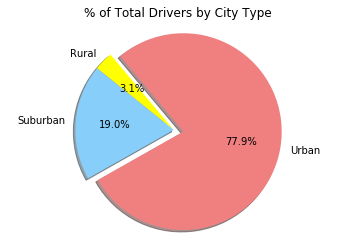

In [19]:
plt.title("% of Total Drivers by City Type")
plt.pie(Pyber_Bubble_Plot_Type['Driver_Count'], explode=explode, labels=Pyber_Bubble_Plot_Fare.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.axis("equal")
plt.show()